# 初学者向けPandas100本ノックver1.0.3

In [1]:
# ライブラリーの読み込み
import pandas as pd
import glob

# DataFrameの準備
df = pd.read_csv('./data/titanic3.csv')
df2 = pd.read_csv('./data/data1.csv')
df3 = pd.read_csv('./data/data1_2.csv')
df4 = pd.read_csv('./data/data1_3.csv')
df5 = pd.read_csv('./data/data2.csv',encoding='cp932')

# 統計 (66 - 79)

In [2]:
# 【71】
# df2においてclassでグルーピングし、クラスごとの科目の
# 最大値、最小値、平均値を求める(name列は削除しておく)

df2 =df2.drop('name',axis=1)
print(df2.groupby('class').max())
print(df2.groupby('class').min())
print(df2.groupby('class').median())

       English  Mathmatics  History
class                              
1          100         100       83
2           93          82       96
       English  Mathmatics  History
class                              
1           40          55       52
2           65          52       79
       English  Mathmatics  History
class                              
1         55.0        74.0     70.0
2         74.5        69.0     88.0


In [3]:
# こうすればgroupebyしたあとに、一気に記述統計値を出力できます。
df2.groupby('class').describe()

English                                                         \
        count       mean        std   min    25%   50%    75%    max   
class                                                                  
1         6.0  61.666667  23.804761  40.0  43.75  55.0  73.75  100.0   
2         4.0  76.750000  11.786291  65.0  71.00  74.5  80.25   93.0   

      Mathmatics             ...               History                    \
           count       mean  ...    75%    max   count   mean        std   
class                        ...                                           
1            6.0  77.666667  ...  96.25  100.0     6.0  70.50  11.708971   
2            4.0  68.000000  ...  73.00   82.0     4.0  87.75   8.995369   

                                       
        min    25%   50%    75%   max  
class                                  
1      52.0  66.25  70.0  79.75  83.0  
2      79.0  80.50  88.0  95.25  96.0  

[2 rows x 24 columns]

In [4]:
# 【72】
# dfの基本統計量を確認(describe)

df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
# 【73】
# dfの各列間の(Pearson)相関係数を確認

df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


Duplicate key in file WindowsPath('C:/Users/iiats/Anaconda3/envs/Python37/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:  IPAexGothic')
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

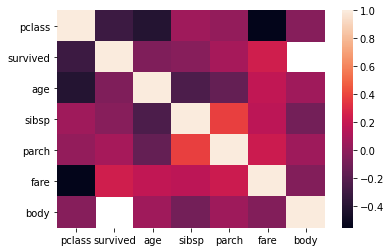

In [6]:
# こうすれば相関行列のヒートマップが描けます。

import matplotlib.pyplot as plt # グラフを描画するライブラリ
import seaborn as sns
%matplotlib inline

sns.heatmap(df.corr())

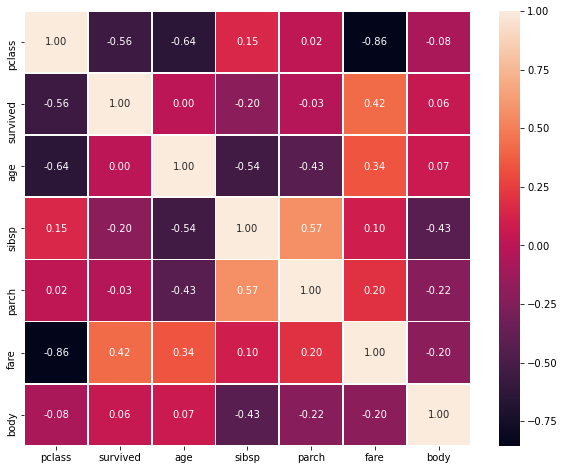

In [7]:
# 私の秘蔵の関数を公開します（笑）

def my_correlation(df):
    corr = df.corr()

    # ヒートマップのプロット
    import matplotlib.pyplot as plt # グラフを描画するライブラリ
    %matplotlib inline
    import seaborn as sns
    fig = plt.figure(figsize=(10,8))
    sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True,fmt='.2f',  # 係数の表示（小数点２位まで）
        linewidths=.75)

my_correlation(df.corr())

In [9]:
# 【74】
# scikit-learnを用いてdf2のEnglish、Mathmatics、History列を標準化する
# (from sklearn.preprocessing import StandardScalerをインポート)

from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv('./data/data1.csv')
df2 = df2.drop(['name','class'],axis=1) #不要列の削除

#標準化を定義
scaler = StandardScaler()
scaler.fit(df2)

#変換とデータフレームへの置換
scaler.transform(df2)
df2_std = pd.DataFrame(scaler.transform(df2), columns=df2.columns)

df2_std.describe() #stdが等しくなっていることを確認

,English,Mathmatics,History
count,1.000000e+01,1.000000e+01,1.000000e+01
mean,-1.998401e-16,1.665335e-16,-4.440892e-16
std,1.054093e+00,1.054093e+00,1.054093e+00
min,-1.421710e+00,-1.332741e+00,-1.981957e+00
25%,-6.518308e-01,-6.602572e-01,-5.774206e-01
50%,6.672284e-02,-2.934477e-01,2.028775e-01
75%,5.799755e-01,6.388600e-01,4.369669e-01
max,1.657806e+00,1.601735e+00,1.451354e+00


データフレームを標準化する場合は、schikit-learnの
StandardScalerを使用

In [10]:
# 【75】
# scikit-learnを用いてdf2のEnglish列を標準化する
# (from sklearn.preprocessing import StandardScalerをインポート)

from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv('./data/data1.csv')

#標準化を定義
scaler = StandardScaler()
scaler.fit(df2['English'].values.reshape(-1,1))

#変換とデータフレームへの置換
scaler.transform(df2['English'].values.reshape(-1,1))
df2_std = pd.DataFrame(scaler.transform(df2['English'].values.reshape(-1,1)))

df2_std.describe() #stdが【74】のEnglishと等しくなっていることを確認

,0
count,1.000000e+01
mean,-1.998401e-16
std,1.054093e+00
min,-1.421710e+00
25%,-6.518308e-01
50%,6.672284e-02
75%,5.799755e-01
max,1.657806e+00


・データフレームのひとつの列を標準化する場合は、  
　values.reshape(-1,1)で配列変換してやる方法もある  
・reshape(-1,1)でn行1列に変換

In [11]:
# 【76】
# scikit-learnを用いてdf2のEnglish、Mathmatics、History列を
# Min-Maxスケーリングする
# (from sklearn.preprocessing import StandardScalerをインポート)

from sklearn.preprocessing import MinMaxScaler

df2 = pd.read_csv('./data/data1.csv')
df2 = df2.drop(['name','class'],axis=1) #不要列の削除

# Min-Maxスケーリングを定義
scaler = MinMaxScaler()
scaler.fit(df2)

# 変換とデータフレームへの置換
scaler.transform(df2)
df2_std = pd.DataFrame(scaler.transform(df2), columns=df2.columns)

df2_std.describe() #minが0、maxが1になっていることを確認

,English,Mathmatics,History
count,10.000000,10.000000,10.000000
mean,0.461667,0.454167,0.577273
std,0.342292,0.359210,0.307019
min,0.000000,0.000000,0.000000
25%,0.250000,0.229167,0.409091
50%,0.483333,0.354167,0.636364
75%,0.650000,0.671875,0.704545
max,1.000000,1.000000,1.000000


・データフレームをMin-Maxスケーリングするする場合は、schikit-learnのStandardScalerを使用  
・Min-Maxスケーリングでは最小値が0、最大値が1となるようにデータを変換する

In [12]:
# 【77】
# dfのfare列の最大値、最小値の行名を取得

print(df['fare'].idxmax())
print(df['fare'].idxmin())

49
7


データフレームの最大値、最小値の行名をお求める場合はidxmax、idxminを使用

In [17]:
# 【78】
# dfのfare列の0、25、50、75、100パーセンタイルを取得

df['fare'].quantile([0, 0.25, 0.5, 0.75, 1.0])

0.00      0.0000
0.25      7.8958
0.50     14.4542
0.75     31.2750
1.00    512.3292
Name: fare, dtype: float64

In [16]:
# コード例2
df.fare.quantile(q=np.arange(5)/4)

0.00      0.0000
0.25      7.8958
0.50     14.4542
0.75     31.2750
1.00    512.3292
Name: fare, dtype: float64

In [19]:
# 【79】
# ①dfのage列の最頻値を取得
# ②value_counts()にてage列の要素数を
# 確認し、①の結果の妥当性を確認

print(df['age'].mode())
print(df['age'].value_counts())

0    24.0
dtype: float64
24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
70.50     1
76.00     1
67.00     1
0.42      1
0.67      1
Name: age, Length: 98, dtype: int64
